In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [6]:
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

In [20]:
# linreg
linreg = LinearRegression()

y_pred_linreg = linreg.fit(X_train, y_train).predict(X_test)
r2_score_linreg = r2_score(y_test, y_pred_linreg)

print("r^2 on test data : %f" % r2_score_linreg)

r^2 on test data : 0.568639


In [9]:
# Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("r^2 on test data : %f" % r2_score_lasso)

r^2 on test data : 0.658064


In [12]:
# Ridge
ridge = Ridge(alpha=alpha)

y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_ridge)

print("r^2 on test data : %f" % r2_score_lasso)

r^2 on test data : 0.585605


In [15]:
# ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.9)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

print("r^2 on test data : %f" % r2_score_enet)

r^2 on test data : 0.649441


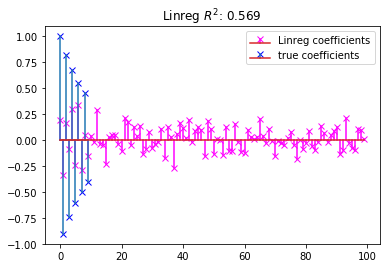

In [26]:
# Plot coefficients
m, s, _ = plt.stem(np.where(linreg.coef_)[0], linreg.coef_[linreg.coef_ != 0],
                   markerfmt='x', label='Linreg coefficients')
plt.setp([m, s], color="#FF00FF")
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Linreg $R^2$: %.3f"
          % r2_score_linreg)
plt.show()

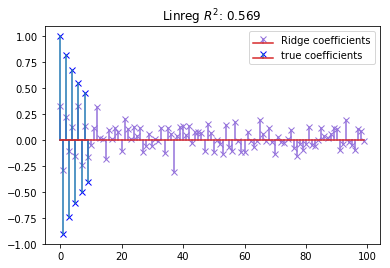

In [28]:
# Plot coefficients
m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0],
                   markerfmt='x', label='Ridge coefficients')
plt.setp([m, s], color='#9370DB')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Linreg $R^2$: %.3f"
          % r2_score_linreg)
plt.show()

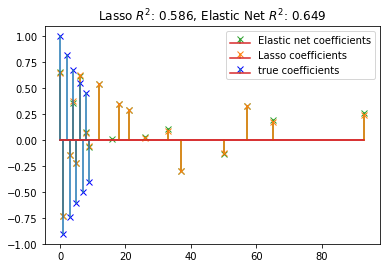

In [29]:
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients')
plt.setp([m, s], color="#2ca02c")

m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()